# Predicting Happiness: A Data-Driven Approach

**Team Members:**
- Mona Albarqi  (ID:S21107360)
- Albatool Moathen (ID:S21107416)


In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Load the dataset
data = pd.read_csv('expanded_dataset_with_missing.csv')

# Display the first few rows
print("Initial Dataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum())


Initial Dataset Overview:
       HAPPINESS   AGE    INCOME  EDUCATION MARITAL_STATUS  GENDER  \
0   Pretty Happy  65.0  136219.0       12.0        Married    Male   
1  Not Too Happy  27.0   33794.0       16.0       Divorced  Female   
2   Pretty Happy  81.0   84609.0        8.0         Single    Male   
3   Pretty Happy  24.0   81108.0        9.0       Divorced  Female   
4     Very Happy  39.0   49557.0       13.0        Married    Male   

  EMPLOYMENT_STATUS     HEALTH       RELIGION  SOCIAL_CONTACT POLITICAL_VIEWS  
0           Student        NaN      Religious             6.0        Moderate  
1          Employed        NaN      Religious             9.0        Moderate  
2           Retired  Excellent            NaN            13.0    Conservative  
3          Employed       Good      Religious             3.0         Liberal  
4          Employed  Excellent  Not Religious            11.0             NaN  

Missing Values Per Column:
HAPPINESS            600
AGE                 

In [4]:
# Handle Missing Values
# For numeric variables, use mean imputation
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For categorical variables, use mode imputation
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Compute the mode
    data[col] = data[col].fillna(mode_value)  # Assign back to the original column



Summary Statistics for Numeric Variables:
               AGE         INCOME    EDUCATION  SOCIAL_CONTACT
count  6000.000000    6000.000000  6000.000000     6000.000000
mean     48.848889   81566.800185    13.423519        9.326296
std      18.390355   35664.984255     3.273101        5.380118
min      18.000000   19315.000000     8.000000        0.000000
25%      34.000000   51080.500000    11.000000        5.000000
50%      48.848889   81566.800185    13.423519        9.326296
75%      63.000000  108784.250000    16.000000       13.000000
max      88.000000  150926.000000    19.000000       20.000000


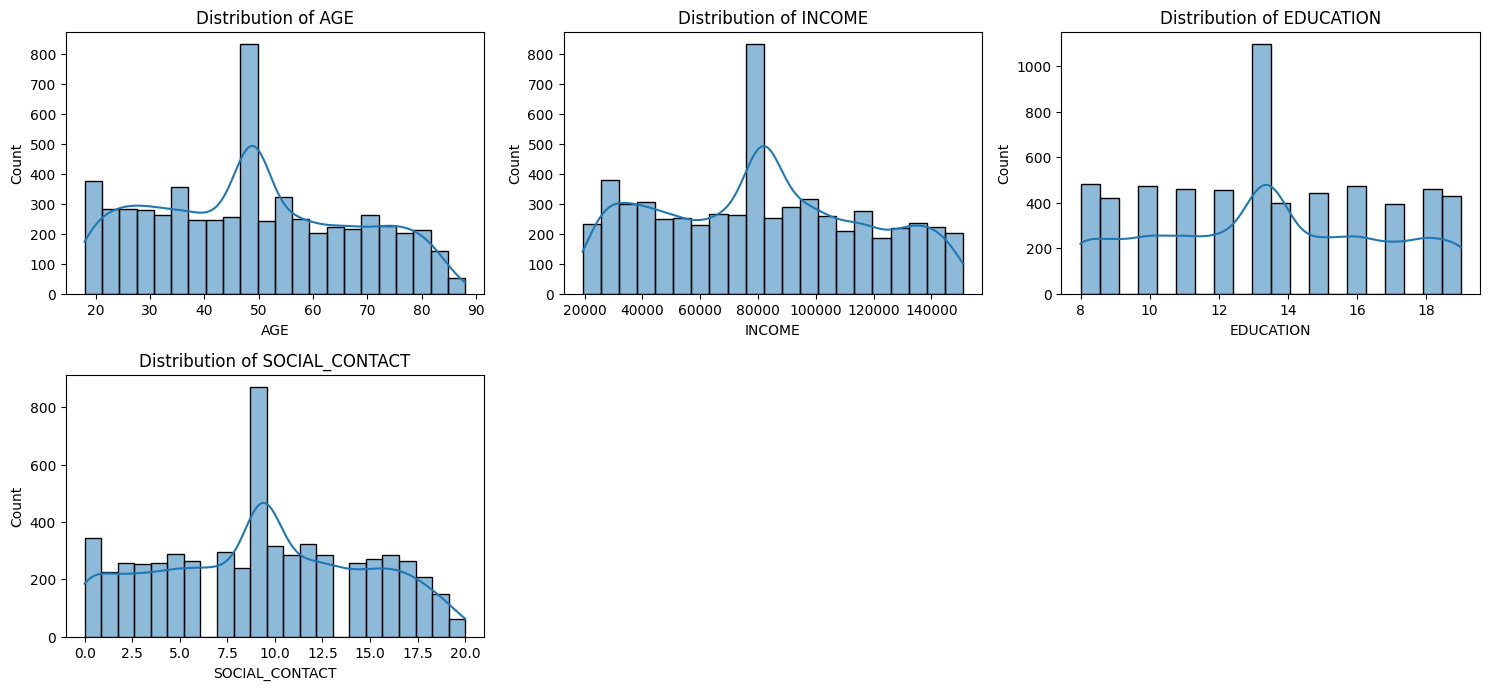

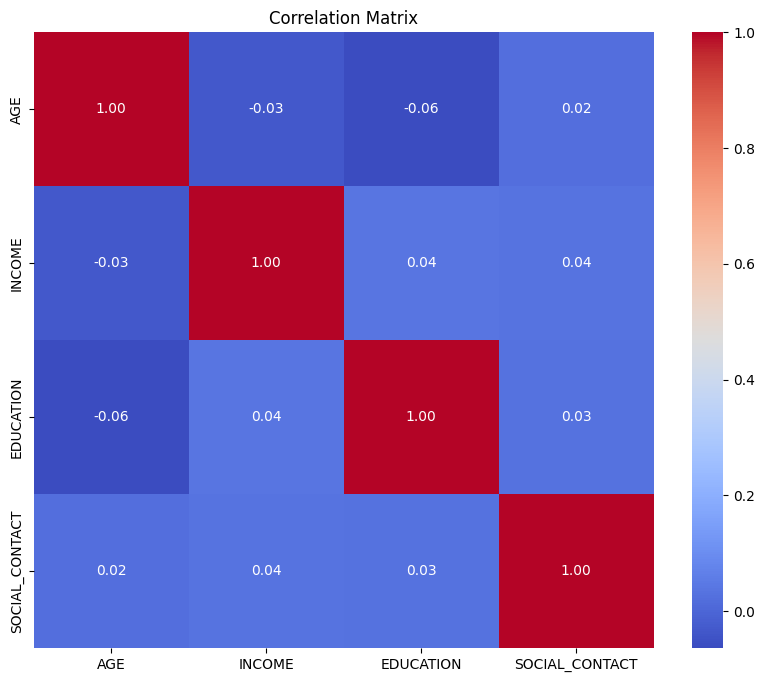

C:\Users\AlbatoolM\AppData\Local\Temp\ipykernel_35140\1641427380.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Happiness Level')


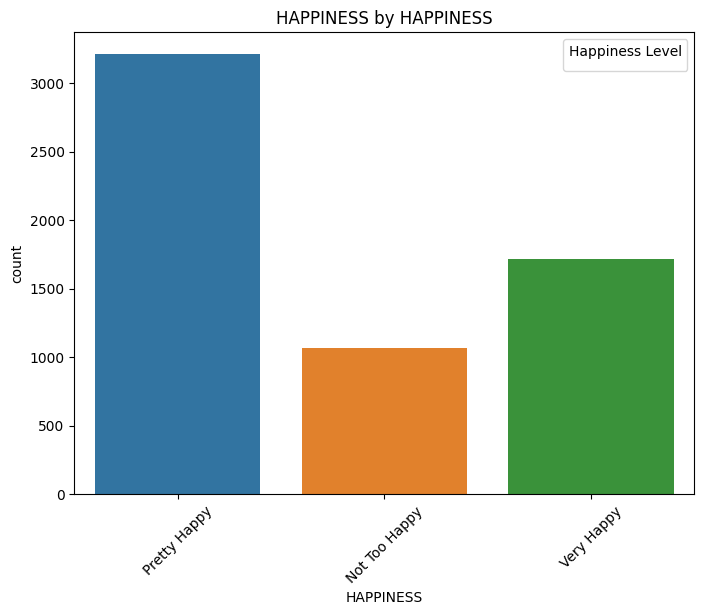

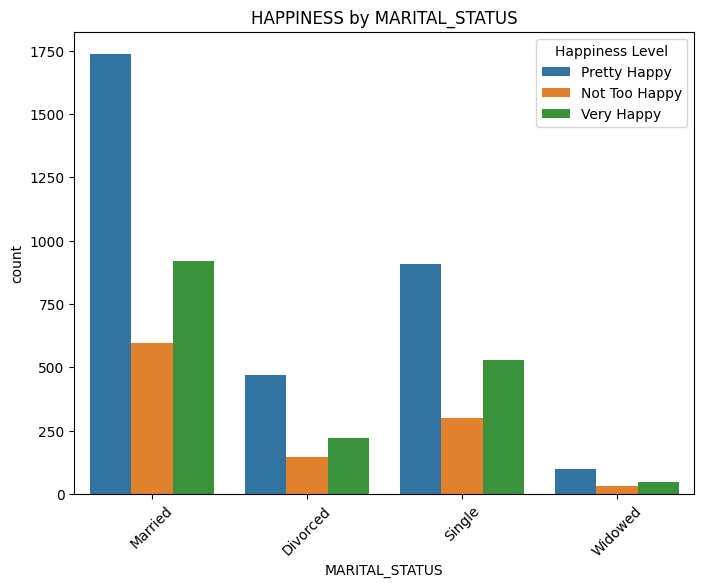

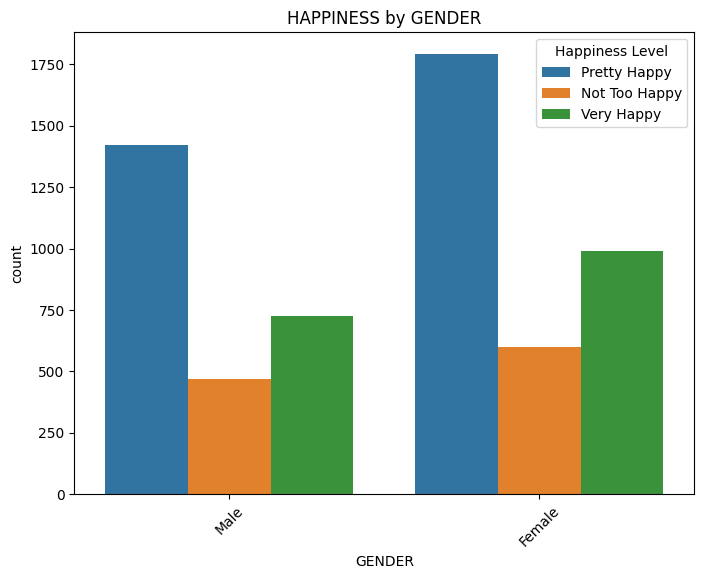

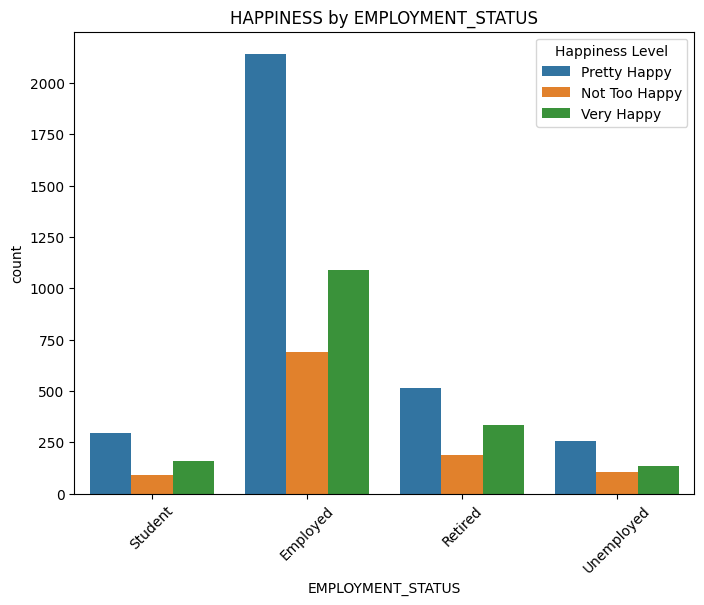

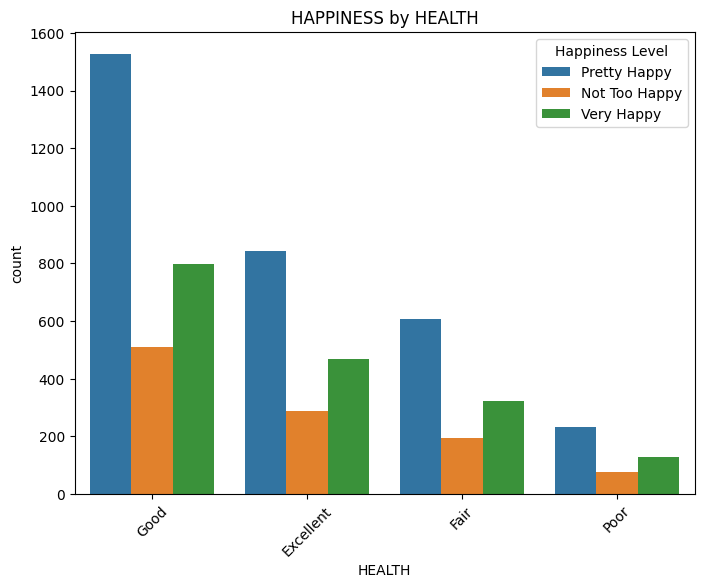

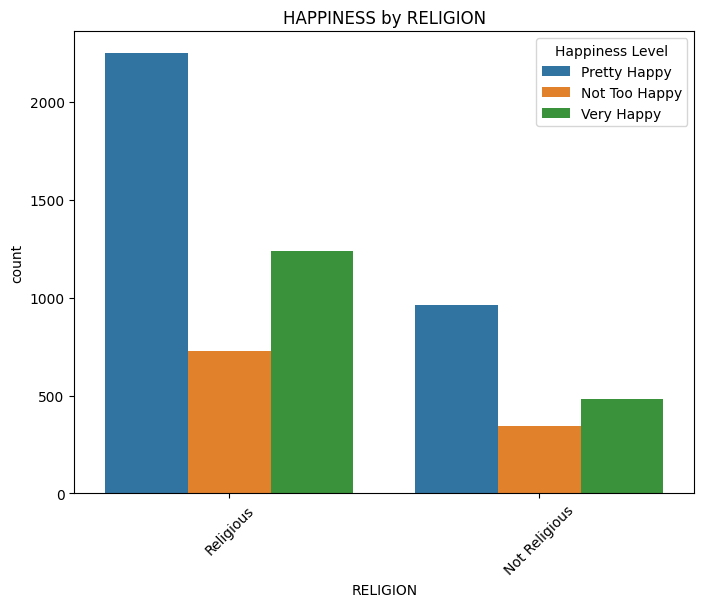

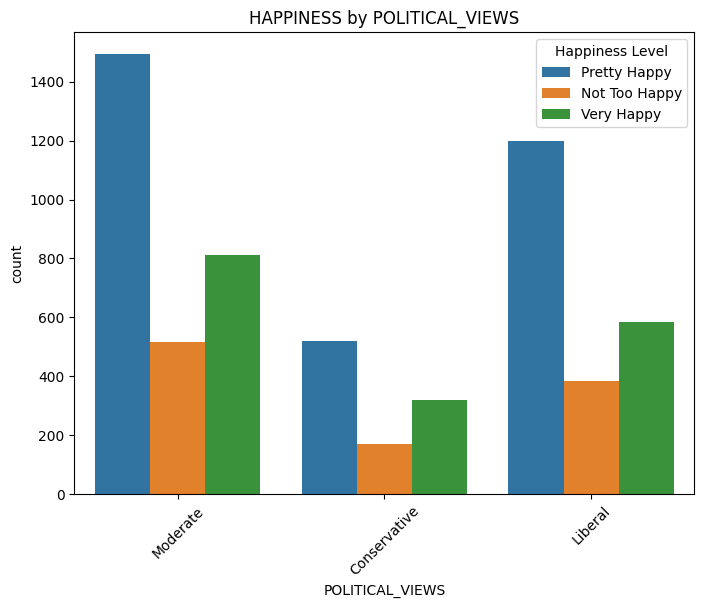

In [8]:
# Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics of numeric variables
print("\nSummary Statistics for Numeric Variables:")
print(data.describe())

# Visualizing the distribution of numeric variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualizing the relationship between the target variable and key predictors
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue='HAPPINESS')
    plt.title(f'HAPPINESS by {col}')
    plt.xticks(rotation=45)
    plt.legend(title='Happiness Level')
    plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display scaled data overview
print("\nScaled Numeric Data (First Few Rows):")
print(data[numeric_cols].head())



Scaled Numeric Data (First Few Rows):
        AGE    INCOME  EDUCATION  SOCIAL_CONTACT
0  0.878311  1.532505  -0.434951       -0.618309
1 -1.188161 -1.339599   0.787234       -0.060654
2  1.748405  0.085306  -1.657135        0.682887
3 -1.351304 -0.012865  -1.351589       -1.175964
4 -0.535591 -0.897588  -0.129404        0.311116


In [19]:
# Ensure all categorical variables are encoded as numbers
from sklearn.preprocessing import LabelEncoder

# Recheck and encode all categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable if not numeric
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Verify that all variables are now numeric
print("\nData Types After Encoding:")
print(X.dtypes)
print("\nTarget Variable Classes:")
print(le_target.classes_ if 'le_target' in locals() else 'Already numeric')




Data Types After Encoding:
AGE                  float64
INCOME               float64
EDUCATION            float64
MARITAL_STATUS         int32
GENDER                 int32
EMPLOYMENT_STATUS      int32
HEALTH                 int32
RELIGION               int32
SOCIAL_CONTACT       float64
POLITICAL_VIEWS        int32
dtype: object

Target Variable Classes:
['Not Too Happy' 'Pretty Happy' 'Very Happy']


In [48]:
# Define features and target variable
X = data.drop(columns=['RELIGION'])  # Features
y = data['RELIGION']  # Target variable

# Ensure all categorical variables are encoded as numbers
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode the target variable if not numeric
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Optional: Print a message to indicate training is complete
print("Models trained successfully!")

C:\Users\AlbatoolM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models trained successfully!


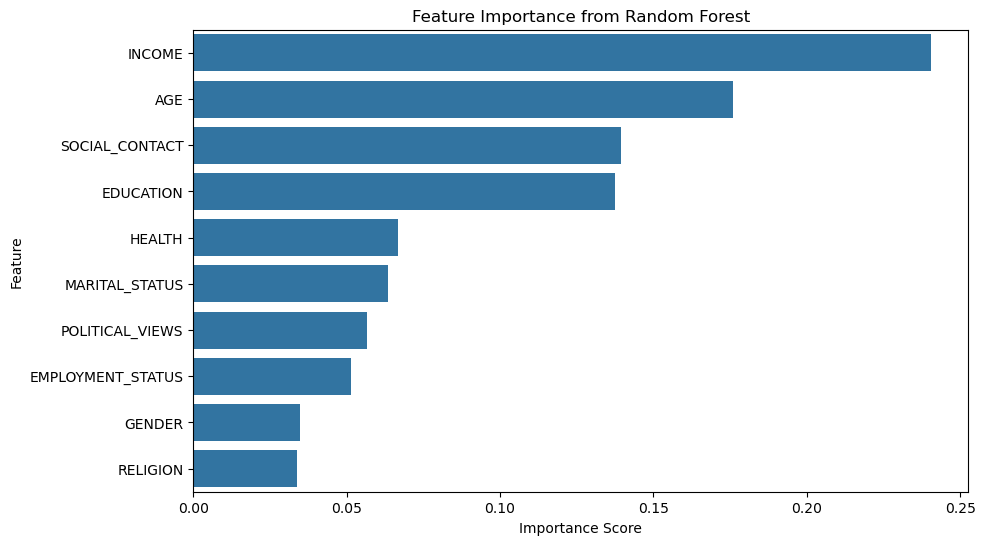

In [25]:
# Ensure all features are numeric before training Random Forest
from sklearn.preprocessing import LabelEncoder

non_numeric_features = X.select_dtypes(include=['object']).columns
for col in non_numeric_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train the Random Forest Model again if necessary
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Feature Importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [27]:
# Display top 5 most important features
print("Top 5 Features Driving Happiness Predictions:")
print(importance_df.head())

# Write insights about the most important features
print("\nInsights:")
print("1. The feature with the highest importance is:", importance_df.iloc[0]['Feature'])
print("2. This indicates it has the strongest influence on predicting happiness levels.")
print("3. Other key features include:", importance_df.iloc[1:5]['Feature'].tolist())


Top 5 Features Driving Happiness Predictions:
          Feature  Importance
1          INCOME    0.240598
0             AGE    0.175797
8  SOCIAL_CONTACT    0.139491
2       EDUCATION    0.137351
6          HEALTH    0.066877

Insights:
1. The feature with the highest importance is: INCOME
2. This indicates it has the strongest influence on predicting happiness levels.
3. Other key features include: ['AGE', 'SOCIAL_CONTACT', 'EDUCATION', 'HEALTH']


In [29]:
# Summarize model performances
print("\nModel Performance Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")



Model Performance Comparison:
Logistic Regression Accuracy: 0.54
Random Forest Accuracy: 0.81


In [31]:
# Summarize the performance of both models
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Model Performance Summary:")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Generate a detailed comparison table
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)'],
    'Logistic Regression': [
        log_reg_accuracy,
        classification_report(y_test, y_pred_log_reg, zero_division=0, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_log_reg, zero_division=0, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_log_reg, zero_division=0, output_dict=True)['weighted avg']['f1-score']
    ],
    'Random Forest': [
        rf_accuracy,
        classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)['weighted avg']['f1-score']
    ]
})
print(performance_comparison)


Model Performance Summary:
Logistic Regression Accuracy: 0.54
Random Forest Accuracy: 0.81
                 Metric  Logistic Regression  Random Forest
0              Accuracy             0.541667       0.811667
1  Precision (Weighted)             0.293403       0.818844
2     Recall (Weighted)             0.541667       0.811667
3   F1-Score (Weighted)             0.380631       0.807648



Top Predictors of Happiness:
          Feature  Importance
1          INCOME    0.240598
0             AGE    0.175797
8  SOCIAL_CONTACT    0.139491
2       EDUCATION    0.137351
6          HEALTH    0.066877


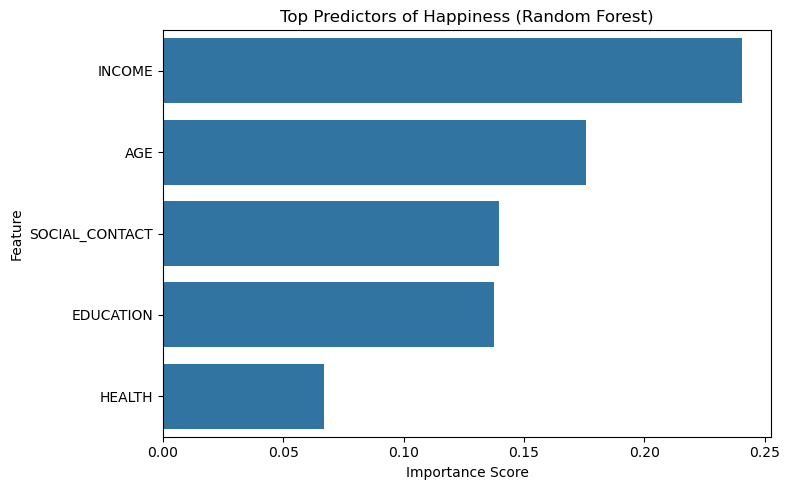

In [33]:
# Display and visualize the top predictors from Random Forest
top_features = importance_df.head(5)
print("\nTop Predictors of Happiness:")
print(top_features)

# Visualize the top predictors
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top Predictors of Happiness (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


In [36]:
from sklearn.inspection import partial_dependence, plot_partial_dependence

plot_partial_dependence(rf_model, X_train, [0, 1], feature_names=features)


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Mona\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)